# 1. Pipeline

### 1.A Check working directory

In [1]:
import os
os.getcwd()

'/Users/corybaird/Desktop/graspp_2025_spring/notebooks/module_3/week_6'

In [2]:
os.chdir("../../../")
os.getcwd()

'/Users/corybaird/Desktop/graspp_2025_spring'

## 1.1 Download Data

In [3]:
from src.data.download_worldbank import DownloadWorldBank

#### Run the following block if you change something in the python file and want those changes reflected in the notebook

import importlib
import src.data.download_worldbank
importlib.reload(src.data.download_worldbank)
from src.data.download_worldbank import DownloadWorldBank

In [4]:
download_wb = DownloadWorldBank(
    indicators=['BX.KLT.DINV.WD.GD.ZS', 'MS.MIL.XPND.GD.ZS', 'NY.GDP.MKTP.CD', 'NE.EXP.GNFS.ZS', 'NE.IMP.GNFS.ZS'],
    countries=['US', 'CA', 'MX', 'JP'],
    date_start='1990',
    date_end='2023'
)

df_wb_raw = download_wb.run(save_data = False)
df_wb_raw.head(2)

Processing indicator: BX.KLT.DINV.WD.GD.ZS
Processing indicator: MS.MIL.XPND.GD.ZS
Processing indicator: NY.GDP.MKTP.CD
Processing indicator: NE.EXP.GNFS.ZS
Processing indicator: NE.IMP.GNFS.ZS


series,country,date,BX.KLT.DINV.WD.GD.ZS,MS.MIL.XPND.GD.ZS,NY.GDP.MKTP.CD,NE.EXP.GNFS.ZS,NE.IMP.GNFS.ZS
0,CAN,1990-01-01,1.409504,1.958794,5.960756e+11,25.074299,24.920165
1,CAN,1991-01-01,0.573724,1.895444,6.125277e+11,24.353317,24.870150


## 1.2. Transform

In [5]:
#### Run the following block if you change something in the python file and want those changes reflected in the notebook

import src.features.generate_features
importlib.reload(src.features.generate_features)
from src.features.generate_features import GenerateFeatures

In [6]:
from src.features.generate_features import GenerateFeatures
transform_tool = GenerateFeatures(
    rolling_window = 3,
    features = ["changepct", "changeraw", "rollingmean", "log", "zscore", "lag1", "lag2"],
    time_period = 'YE'
)

In [7]:
df_wb_feat = transform_tool.transform(df_wb_raw)
df_wb_feat.head(2)

,country,date,BX.KLT.DINV.WD.GD.ZS,MS.MIL.XPND.GD.ZS,NY.GDP.MKTP.CD,NE.EXP.GNFS.ZS,NE.IMP.GNFS.ZS,BX.KLT.DINV.WD.GD.ZS_chraw1YE,MS.MIL.XPND.GD.ZS_chraw1YE,NY.GDP.MKTP.CD_chraw1YE,...,BX.KLT.DINV.WD.GD.ZS_lag2YE,MS.MIL.XPND.GD.ZS_lag2YE,NY.GDP.MKTP.CD_lag2YE,NE.EXP.GNFS.ZS_lag2YE,NE.IMP.GNFS.ZS_lag2YE,BX.KLT.DINV.WD.GD.ZS_zscoreYE,MS.MIL.XPND.GD.ZS_zscoreYE,NY.GDP.MKTP.CD_zscoreYE,NE.EXP.GNFS.ZS_zscoreYE,NE.IMP.GNFS.ZS_zscoreYE
0,CAN,1990-01-01,1.409504,1.958794,5.960756e+11,25.074299,24.920165,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.718364,2.568489,-1.211509,-1.786018,-2.506791
1,CAN,1991-01-01,0.573724,1.895444,6.125277e+11,24.353317,24.870150,-0.83578,-0.063349,1.645212e+10,...,NaN,NaN,NaN,NaN,NaN,-1.163844,2.318356,-1.180728,-1.938141,-2.522882


## 1.3 Running the pipeline from one file

### 1.3.1 Bootleg

In [8]:
import run_analysis

Step 1: Download
Processing indicator: BX.KLT.DINV.WD.GD.ZS
Processing indicator: MS.MIL.XPND.GD.ZS
Processing indicator: NY.GDP.MKTP.CD
Processing indicator: NE.EXP.GNFS.ZS
Processing indicator: NE.IMP.GNFS.ZS
Step 2: Transform
Saved features here: data/features/wb_feat.csv


### 1.3.2 Advanced

In [9]:
from run_analysis_advanced import RunAnalysis

In [10]:
analysis_runner = RunAnalysis()
analysis_runner.run()

Step 1: Download
Processing indicator: BX.KLT.DINV.WD.GD.ZS
Processing indicator: MS.MIL.XPND.GD.ZS
Processing indicator: NY.GDP.MKTP.CD
Processing indicator: NE.EXP.GNFS.ZS
Processing indicator: NE.IMP.GNFS.ZS
series country       date  BX.KLT.DINV.WD.GD.ZS  MS.MIL.XPND.GD.ZS  \
0          CAN 2020-01-01              1.758971           1.400836   
1          CAN 2021-01-01              2.998283           1.267294   

series  NY.GDP.MKTP.CD  NE.EXP.GNFS.ZS  NE.IMP.GNFS.ZS  
0         1.655685e+12       29.473647       31.683124  
1         2.007472e+12       31.216353       31.207811  

Step 2: Transform
Saved features here: data/features/wb_feat.csv

Step 3: Visualization (Implementation Placeholder)
Visualization steps would be executed here if the module exists and data is available.


# 2. Adding viz and regression to the pipeline

## 2.1 Add viz

In [11]:
from src.viz.plot_basic import PlotBasic

In [12]:
viz = PlotBasic()
viz.plot_timeseries(
        df=df_wb_feat,
    y_data='NE.EXP.GNFS.ZS',
    y_feat='chpct1YE',
    x_data='NY.GDP.MKTP.CD',
    x_feat='chpct1YE',
    x_label='GDP Growth',
    y_label='Export Growth'
)

Saved plot to: reports/viz/timeseries.png


In [13]:
viz.plot_histogram(
    df=df_wb_feat,
    data_col='NY.GDP.MKTP.CD',
    feature='chpct1YE',
    label='GDP Growth',
    title='Histogram of GDP Growth',
)

Saved plot to: reports/viz/histogram.png


/Users/corybaird/Desktop/graspp_2025_spring/src/viz/plot_basic.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


In [14]:
viz.plot_scatter(
    df=df_wb_feat,
    y_data='NE.EXP.GNFS.ZS',
    y_feat='chpct1YE',
    x_data='NY.GDP.MKTP.CD',
    x_feat='chpct1YE',
    x_label='GDP Growth',
    y_label='Export Growth'
)

                               OLS Regression Results                              
Dep. Variable:     NE.EXP.GNFS.ZS_chpct1YE   R-squared:                       0.171
Model:                                 OLS   Adj. R-squared:                  0.165
Method:                      Least Squares   F-statistic:                     26.87
Date:                     Fri, 16 May 2025   Prob (F-statistic):           8.11e-07
Time:                             11:05:32   Log-Likelihood:                 127.72
No. Observations:                      132   AIC:                            -251.4
Df Residuals:                          130   BIC:                            -245.7
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

## 2.2 Regression

In [15]:
import statsmodels.api as sm
import pandas as pd

def ols(df, y_data, y_feat, x_data, x_feat):
    y_col = f"{y_data}_{y_feat}" if y_feat else y_data
    x_col = f"{x_data}_{x_feat}" if x_feat else x_data

    data = df[[x_col, y_col]].dropna()

    y = data[y_col]
    X = data[x_col]
    X = sm.add_constant(X)  # Add a constant (intercept) to the independent variable

    model = sm.OLS(y, X)
    results = model.fit()
    print(results.summary())

ols(
    df=df_wb_feat,
    y_data='NE.EXP.GNFS.ZS',
    y_feat='chpct1YE',
    x_data='NY.GDP.MKTP.CD',
    x_feat='chpct1YE'
)

                               OLS Regression Results                              
Dep. Variable:     NE.EXP.GNFS.ZS_chpct1YE   R-squared:                       0.171
Model:                                 OLS   Adj. R-squared:                  0.165
Method:                      Least Squares   F-statistic:                     26.87
Date:                     Fri, 16 May 2025   Prob (F-statistic):           8.11e-07
Time:                             11:05:33   Log-Likelihood:                 127.72
No. Observations:                      132   AIC:                            -251.4
Df Residuals:                          130   BIC:                            -245.7
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

# 3. Regression explainer

## 3.1 Simple linear regression

#### Ignore the fancy math

$$y_t = \alpha + b_t x_t + u_t$$

$$\hat\beta = \frac{\sum(x_t-\bar x_t)(y_t-\bar y)}{\sum(x_t-\bar x)^2}=\frac{Cov(x_i,y_i)}{Var(x_i}\\
\hat\alpha = \bar y-\hat\beta \bar x$$

In [23]:
import numpy as np
from scipy import stats

np.random.seed(10)
n = 20 # sample size 
K = 2  # number of paramters
sim = np.hstack( ( np.ones( (n,1) ), stats.norm.rvs(  size = (n, K))) ) 
df = pd.DataFrame(sim, columns=['c','y','x'])
df.head(2) 

,c,y,x
0,1.0,1.331587,0.715279
1,1.0,-1.545400,-0.008384


### 3.1.1 Calculate by hand

In [35]:
df['xt'] = (df.x-np.mean(df.x))
df['yt'] = (df.y-np.mean(df.y))
df['xt2'] = df.x**2
df['yt2'] = df.y**2
df['beta'] = sum(df.xt*df.yt)/sum(df.xt2)
df['alpha'] = np.mean(df.y)- (df.beta*np.mean(df.x)) #Also alpha
df['y_hat'] = df.alpha+df.x*df.beta
df['u_hat'] = df.y-df.alpha-(df.beta*df.x)
df['y_mean'] = np.mean(df.y)
df.head(2)

,c,y,x,xt,yt,xt2,yt2,beta,alpha,y_hat,u_hat,y_mean
0,1.0,1.331587,0.715279,0.511383,1.191970,0.511624,1.773123,0.153198,0.10838,0.217960,1.113627,0.139617
1,1.0,-1.545400,-0.008384,-0.212280,-1.685017,0.000070,2.388262,0.153198,0.10838,0.107096,-1.652496,0.139617


In [36]:
beta = sum(df.xt*df.yt)/sum(df.xt2)
alpha = np.mean(df.y)- (beta*np.mean(df.x))
print("Beta_hand: {:.4f}, Alpha_hand: {:.4f}".format(beta, alpha))

Beta_hand: 0.1532, Alpha_hand: 0.1084


### 3.1.2 Calculate with statsmodels

In [19]:
X = df[['c','x']]
y = df['y']

In [22]:
ols_single = sm.OLS(y , X).fit()

print("Beta_model: {:.4f}, Alpha_model: {:.4f}".format(ols_single .params[1], ols_single.params[0]))

Beta_hand: 0.1532, Alpha_hand: 0.1084
Beta_model: 0.1598, Alpha_model: 0.1070


/var/folders/zq/kvy10zrs4_7cgk5bsh75ycx40000gn/T/ipykernel_44816/1206623027.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Beta_model: {:.4f}, Alpha_model: {:.4f}".format(ols_single .params[1], ols_single.params[0]))


### 3.1.3 Visual

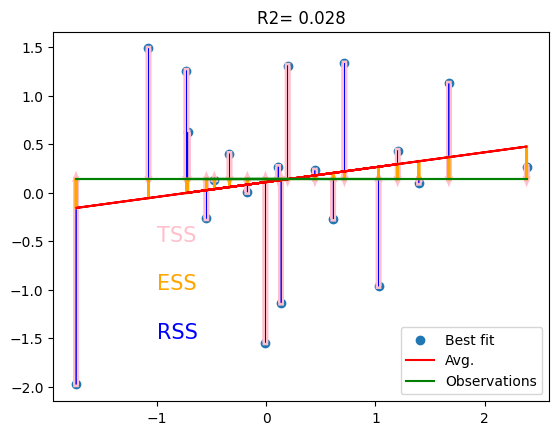

In [26]:
import matplotlib.pyplot as plt

x=df.x.values
y=df.y.values
best_fit = df.y_hat.values
tss_graph = -(df.y-df.y_mean)
ess_graph = -(df.y_hat-df.y_mean)
rss_graph = -(df.y-df.y_hat)

ess = sum((df.y_hat-df.y_mean)**2)
rss = sum((df.y-df.y_hat)**2)
tss = sum((df.y-df.y_mean)**2)
r2= 1-rss/tss

ax = plt.scatter(df.x,df.y, label=None)
ax =plt.plot(df.x, df.y_hat, color='red')
ax =plt.plot(df.x, df.y_mean, color='green', label='Y_mean')

for i in range(0,len(df.x)):
    plt.arrow(x[i], y[i], 0, tss_graph[i], head_width=None, head_length=None, linewidth=4, color='pink', label='TSS')

for i in range(0,len(df.x)):
    plt.arrow(x[i], y[i], 0, rss_graph[i], head_width=None, head_length=None, linewidth=.5, color='blue', label='RSS')

for i in range(0,len(df.x)):
    plt.arrow(x[i], best_fit[i], 0, ess_graph[i], head_width=None, head_length=None, linewidth=2, color='orange', label='ESS')

plt.annotate("TSS", xy=(-1, -.5), xytext=(-1, -.5), size=15,color='pink')
plt.annotate("RSS", xy=(-1, -1.5), xytext=(-1, -1.5), size=15,color='blue')
plt.annotate("ESS", xy=(-1, -1), xytext=(-1, -1), size=15,color='orange')


plt.legend(['Best fit', 'Avg.','Observations'])

    
    
plt.title('R2= {:.3f}'.format(r2))
plt.show()

## 3.2 Calculating OLS using matrix algebra

### 3.2.1 Generate random data X,Y

In [31]:
np.random.seed(1)
n = 20 # sample size 
K = 2  # number of paramters
X = np.hstack( ( np.ones( (n,1) ), stats.norm.rvs(  size = (n, K))) )  # Indpendent variables
Y = stats.norm.rvs(  size = (20, 1)) # Dependent Variables

### 3.2.2 Calculate  $\hat{\beta}$ by hand: 

Remember $\hat{\beta}: (X' X)^{-1} X'Y$

In [32]:
bhat = np.linalg.inv(X.T@X)@(X.T@Y)
intercept = bhat[0]
bhat1 = bhat[1]
bhat2 = bhat[2]

### 3.2.3 Compare to statsmodels

In [33]:
#Create dataframe with Y & X

yx = pd.DataFrame(np.concatenate([Y,X], axis=1))
yx.columns = ['Y', 'Constant', 'X1', 'X2']

# Import ols from statsmodels, and fit a model to the data
from statsmodels.formula.api import ols
ols_multi = ols(formula="Y ~ X1+X2", data=yx)
ols_multi = ols_multi.fit()

# Extract the model parameter values, and assign them to a0, a1
a0 = ols_multi.params['Intercept']
a1 = ols_multi.params['X1']
a2 = ols_multi.params['X2']

In [34]:
print('Calculated by hand:')
print('Intercept = {:.4f}'.format(float(intercept)))
print('bhat1= {:.4f} '.format(float(bhat1)))
print('bhat2= {:.4f} '.format(float(bhat2)))
print('')
print('Calculated using OLS:')
print( "Intercept  = {:0.4f}".format(a0) )
print( "bhat1 = {:0.4f}".format(a1) )
print( "bhat2 = {:0.4f}".format(a2) )

Calculated by hand:
Intercept = 0.2859
bhat1= 0.1272 
bhat2= 0.2650 

Calculated using OLS:
Intercept  = 0.2859
bhat1 = 0.1272
bhat2 = 0.2650


/var/folders/zq/kvy10zrs4_7cgk5bsh75ycx40000gn/T/ipykernel_44816/4255896593.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Intercept = {:.4f}'.format(float(intercept)))
/var/folders/zq/kvy10zrs4_7cgk5bsh75ycx40000gn/T/ipykernel_44816/4255896593.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('bhat1= {:.4f} '.format(float(bhat1)))
/var/folders/zq/kvy10zrs4_7cgk5bsh75ycx40000gn/T/ipykernel_44816/4255896593.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated Nu